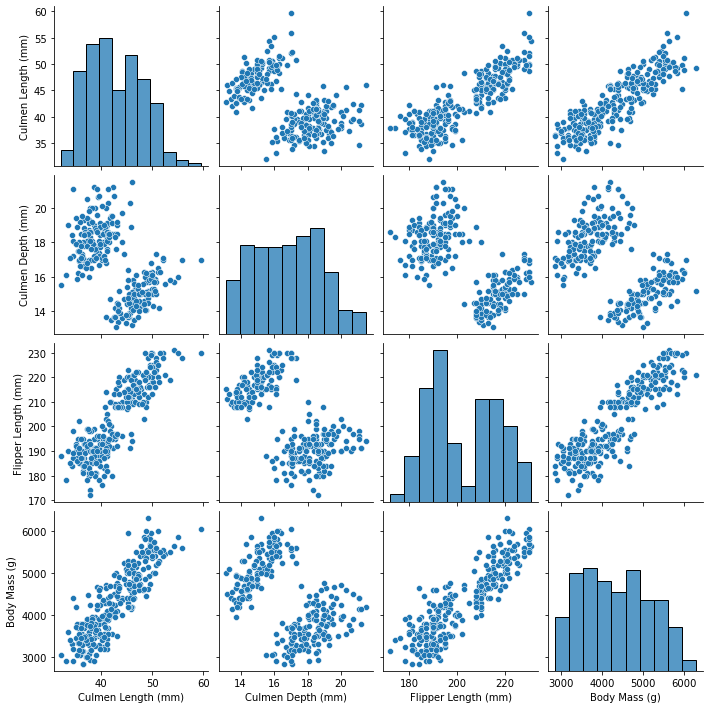

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('penguins_simple.csv',sep = ';')
df = df[df['Species']!='Chinstrap']
df['Species'].value_counts()
sns.pairplot(df)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

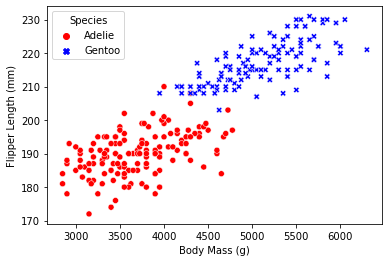

In [47]:
sns.scatterplot(x='Body Mass (g)', 
                y='Flipper Length (mm)', 
                data=df, 
                hue='Species', 
                style= 'Species',
                palette=['red','blue']
                )

In [48]:
df['Species_category'] = np.where(df['Species']=='Adelie',0,1)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [50]:
X = df[['Body Mass (g)','Flipper Length (mm)']] #When I want multiple columns I need a list! Remember it :P
y = df['Species_category']

In [51]:
X.shape, y.shape

((265, 2), (265,))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [53]:
df.isna().sum()

Species                0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Species_category       0
dtype: int64

In [54]:
X_train = (X_train-X_train.mean())/X_train.std() #Normalizing data. 
#Best first separate the data and then normalize but propably not affecting much

In [55]:
X_test = (X_test-X_test.mean())/X_test.std() #Don't forget to normalize everything!

In [56]:
m = LogisticRegression()

In [57]:
m.fit(X_train,y_train)

LogisticRegression()

In [58]:
m.coef_,m.intercept_

(array([[1.64705329, 3.60836991]]), array([-0.67157121]))

In [59]:
###We created the model!! Now we need to evaluate our model
m.score(X_train,y_train)

0.9811320754716981

In [60]:
##And for our test data:
m.score(X_test,y_test)

1.0

In [ ]:
#Now we can predict!!! :D